In [1]:
import keras
import tensorflow
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

#supress warning/error messqges terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#load in data from mnist dataset(60ktraining,10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
#reshape and convert to one-hot encoder
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [3]:
#split main training set into train/validation sets(6k out of 60k data points reserved for validation)
x_validate = x_train[:6000, :]
y_validate = y_train[:6000, :]
x_train = x_train[6000:, :]
y_train = y_train[6000:, :]

In [6]:
model = models.Sequential()
model.add(layers.Dense(56, activation='relu', input_shape=(784,)))
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])


Epoch 1/5
106/106 - 1s - loss: 0.1901 - accuracy: 0.9440 - val_loss: 0.2279 - val_accuracy: 0.9353 - 614ms/epoch - 6ms/step
Epoch 2/5
106/106 - 1s - loss: 0.1631 - accuracy: 0.9511 - val_loss: 0.2308 - val_accuracy: 0.9372 - 641ms/epoch - 6ms/step
Epoch 3/5
106/106 - 1s - loss: 0.1435 - accuracy: 0.9570 - val_loss: 0.2075 - val_accuracy: 0.9450 - 605ms/epoch - 6ms/step
Epoch 4/5
106/106 - 1s - loss: 0.1255 - accuracy: 0.9623 - val_loss: 0.2104 - val_accuracy: 0.9405 - 601ms/epoch - 6ms/step
Epoch 5/5
106/106 - 1s - loss: 0.1110 - accuracy: 0.9664 - val_loss: 0.2012 - val_accuracy: 0.9450 - 600ms/epoch - 6ms/step
Finished fitting.
Checking accuracy on test set...
20/20 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9420

Accuracy on test set: 0.9419999718666077


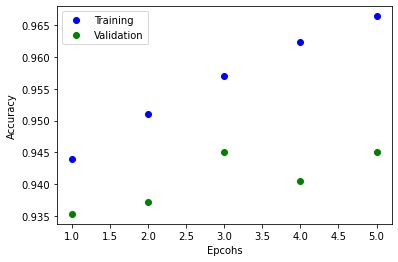

In [9]:
#training the NN

epochs=5
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")


#plotting learning curves during training(on both training and validation data)
epoch_labels=range(1,epochs+1)
hist_dict=history.history
plt.title=("Accuracy vs Epochs")
plt.plot(epoch_labels,hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels,hist_dict["val_accuracy"],'go',label="Validation")
plt.legend(loc="best")
plt.xlabel("Epcohs")
plt.ylabel("Accuracy")

#evaluating final peformance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test, y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()